# Capstone Project - The Battle of Neighborhoods

###  : Recommend neighborhood of Bangkok for Authentic Thai restaurant

# 1. Discussion and Background of the Business Problem:

# [Thai Restaurant]

### Introduction Section

This final project explores the best locations for Authentic Thai restaurants throughout the Bangkok, Thailand.  

Bangkok is one of the world's top tourist destinations. Of 162 cities worldwide, MasterCard ranked Bangkok as the top destination city by international visitor arrivals in its Global Destination Cities Index 2018, ahead of London, with just over 20 million overnight visitors in 2017 

As the main gateway through which visitors arrive in Thailand, Bangkok is visited by the majority of international tourists to the country. Domestic tourism is also prominent. The Department of Tourism recorded 26,861,095 Thai and 11,361,808 foreign visitors to Bangkok in 2010. Lodgings were made by 15,031,244 guests, who occupied 49.9 percent of the city's 86,687 hotel rooms. Bangkok also topped the list as the world's most popular tourist destinations in 2017 rankings

With its diverse culture, comes diverse food items. There are many restaurants in Bangkok City, each belonging to different categories like Thai, Japanese Chinese, Indian, French, etc.

So. this project will help to recommending the top venues in each neighborhood of Bangkok. For Foreigner traveler, Business man, ect. Who want to have experience with Authentic Thai restaurant, 

Reference from https://en.wikipedia.org/wiki/Bangkok

### Target Audience

- Traveler who want to have experience with Authentic Thai restaurant
- Business personnel who wants to invest or open a restaurant.
- Finding the best location for opening a restaurant


# 2. Data section


### Bangkok Neighborhoods Data


Beautiful soup web scraping is used to scrap the list of 50 districts of Bangkok from the following url: https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok

### Foursquare API:

Four-square API as its prime data gathering source. Many organizations are using to geo-tag their photos with detailed info about a destination

This API provides the ability to perform location search, location sharing and details about a business.

# 3. Methodology

### 3.1. Business Understanding

The aim of this project is to find the best neighborhood of Bangkok to recommend Foreigner traveler to get experience with Authentic Thai restaurant

### 3.2. Analytical Approach

The total number of neighborhoods in Bangkok are 50 so we need to find a way to cluster them based on their similarities, that are the number and the kind of restaurant.

Briefly, after some steps of Data Cleaning and Data Exploration, I will use a K-Means algorithm to extract the clusters, produce a map and make an argument on the final result.

### 3.3. Data Exploration

To explore the data, I will use “Folium” a python library that can create interactive leaflet map using coordinate data.
The code above is an example how to check the centroids of every neighborhood in Bangkok.

In [1]:
#import library 
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests 
import pandas as pd
import numpy as np

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Use Webscraping to Extract List of districts of Bangkok

Use the `requests` library to download the webpage https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok. Save the text of the response as a variable named `html_data`.


In [2]:
url = " https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok"

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')


In [3]:
soup.title.string

'List of districts of Bangkok - Wikipedia'

In [4]:
## This returns a list containing all the tables in the HTML
soup.find_all('table')

## How many tables are there in this HTML? 
len(soup.find_all('table'))

2

In [5]:
table = soup.find('table',{'class':'wikitable sortable'})
table

<table class="wikitable sortable">
<tbody><tr align="center" style="background:#d8edff">
<th>District<br/>(<i>Khet</i>)</th>
<th>Map<br/>Nr</th>
<th>Post-<br/>code</th>
<th>Thai</th>
<th>Popu-<br/>lation<br/></th>
<th>No. of<br/>Subdis-<br/>tricts<br/><i>Khwaeng</i>
</th>
<th>Latitude
</th>
<th>Longitude
</th></tr>
<tr>
<td><a href="/wiki/Bang_Bon_District" title="Bang Bon District">Bang Bon</a></td>
<td>50</td>
<td>10150</td>
<td>บางบอน</td>
<td align="right">105,161</td>
<td>4
</td>
<td>13.6592
</td>
<td>100.3991
</td></tr>
<tr>
<td><a href="/wiki/Bang_Kapi_District" title="Bang Kapi District">Bang Kapi</a></td>
<td>6</td>
<td>10240</td>
<td>บางกะปิ</td>
<td align="right">148,465</td>
<td>2
</td>
<td>13.765833
</td>
<td>100.647778
</td></tr>
<tr>
<td><a href="/wiki/Bang_Khae_District" title="Bang Khae District">Bang Khae</a></td>
<td>40</td>
<td>10160</td>
<td>บางแค</td>
<td align="right">191,781</td>
<td>4
</td>
<td>13.696111
</td>
<td>100.409444
</td></tr>
<tr>
<td><a href="/wiki/B

 each table header is defined with a "th" tag. So, we could just look up all the th elements within the table.

In [6]:
headers = [header.text.strip() for header in table.find_all('th')]
headers

['District(Khet)',
 'MapNr',
 'Post-code',
 'Thai',
 'Popu-lation',
 'No. ofSubdis-trictsKhwaeng',
 'Latitude',
 'Longitude']

Let’s now parse the rows containing the data, Each table data/cell is defined with a td tag and the entire row resides within a tr tag.

In [7]:
rows = []

# Find all `tr` tags
data_rows = table.find_all('tr')

for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    # Remove data arrays that are empty
    if len(beautified_value) == 0:
        continue
    rows.append(beautified_value)


Tranform the data into a _pandas_ dataframe

In [8]:
# define the dataframe columns
df = pd.DataFrame(rows, columns = headers)
df.head()

,District(Khet),MapNr,Post-code,Thai,Popu-lation,No. ofSubdis-trictsKhwaeng,Latitude,Longitude
0,Bang Bon,50,10150,บางบอน,"105,161",4,13.6592,100.3991
1,Bang Kapi,6,10240,บางกะปิ,"148,465",2,13.765833,100.647778
2,Bang Khae,40,10160,บางแค,"191,781",4,13.696111,100.409444
3,Bang Khen,5,10220,บางเขน,"189,539",2,13.873889,100.596389
4,Bang Kho Laem,31,10120,บางคอแหลม,"94,956",3,13.693333,100.5025


In [9]:
#clean dataframe 
df_bangkok =df.drop(['MapNr','Thai','Post-code', 'Thai','Popu-lation', 'No. ofSubdis-trictsKhwaeng'], axis = 1)
df_bangkok.head()

,District(Khet),Latitude,Longitude
0,Bang Bon,13.6592,100.3991
1,Bang Kapi,13.765833,100.647778
2,Bang Khae,13.696111,100.409444
3,Bang Khen,13.873889,100.596389
4,Bang Kho Laem,13.693333,100.5025


### Explore Neighborhoods in Bangkok



Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = '2L1MGRX3NSBDJCRLRLUZYIODBKYQ3R0ZVSBXT44RE0UCS0IQ' # your Foursquare ID
CLIENT_SECRET = '42ZNETTE4GJN4EBD0BS2PGBKBQ0W1BGMNRXUGE3LP2A5Q0IV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2L1MGRX3NSBDJCRLRLUZYIODBKYQ3R0ZVSBXT44RE0UCS0IQ
CLIENT_SECRET:42ZNETTE4GJN4EBD0BS2PGBKBQ0W1BGMNRXUGE3LP2A5Q0IV


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
bangkok_venues =  getNearbyVenues(names = df_bangkok['District(Khet)'], latitudes = df_bangkok['Latitude'] , longitudes =df_bangkok['Longitude'])

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa


In [13]:
print(bangkok_venues.shape)
bangkok_venues.head()

(2915, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center
3,Bang Bon,13.6592,100.3991,Lotus Express (โลตัส เอ็กซ์เพรส),13.657839,100.397243,Convenience Store
4,Bang Bon,13.6592,100.3991,เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น,13.654137,100.405323,Noodle House


Let's check how many venues were returned for each neighborhood

In [14]:
bangkok_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bang Bon,20,20,20,20,20,20
Bang Kapi,100,100,100,100,100,100
Bang Khae,24,24,24,24,24,24
Bang Khen,68,68,68,68,68,68
Bang Kho Laem,56,56,56,56,56,56
Bang Khun Thian,86,86,86,86,86,86
Bang Na,21,21,21,21,21,21
Bang Phlat,28,28,28,28,28,28
Bang Rak,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [15]:
print('There are {} uniques categories.'.format(len(bangkok_venues['Venue Category'].unique())))

There are 233 uniques categories.


### Analyze Each Neighborhood

In [16]:
# one hot encoding
bangkok_onehot = pd.get_dummies(bangkok_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangkok_onehot['neighborhood'] = bangkok_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bangkok_onehot.columns[-1]] + list(bangkok_onehot.columns[:-1])
bangkok_onehot = bangkok_onehot[fixed_columns]

bangkok_onehot.head()

,neighborhood,Accessories Store,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Canal,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Shop,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Rooftop Bar,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
0,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

And let's examine the new dataframe size.

In [17]:
bangkok_onehot.shape

(2915, 234)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [18]:
bangkok_grouped = bangkok_onehot.groupby('neighborhood').mean().reset_index()
bangkok_grouped.head()

,neighborhood,Accessories Store,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Canal,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Shop,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Ramen Restaurant,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Rooftop Bar,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
0,Bang Bon,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.05,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.050000,0.0,0.0,0.050000,0.0,0.00,0.0,0.100000,0.0,0.0,0.00,0.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.050000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.0,0.000000,0.00,0.0,0.0,0.20

Let's confirm the new size

In [19]:
bangkok_grouped.shape

(50, 234)

extract only the Neighborhood and Thai Restaurant column for further analysis:

In [20]:
bangkok_grouped_thai_res = bangkok_grouped[['neighborhood', 'Thai Restaurant']]
bangkok_grouped_thai_res.columns = ['neighborhood','Mean_of_frequency_ThaiRes']
bangkok_grouped_thai_res.head()

,neighborhood,Mean_of_frequency_ThaiRes
0,Bang Bon,0.150000
1,Bang Kapi,0.030000
2,Bang Khae,0.000000
3,Bang Khen,0.029412
4,Bang Kho Laem,0.107143


### Clustering the Neighborhoods:

We will extract Thai restaurant data from the above table and fit this into the code for finding the best value of K.

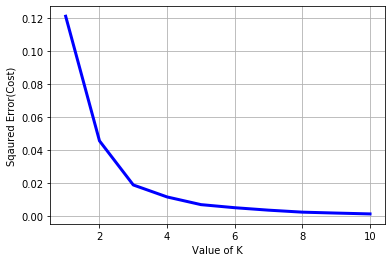

In [21]:
bangkok_grouped_clustering = bangkok_grouped_thai_res.drop('neighborhood', 1)
cost = []


for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 500)
    kmeans.fit(bangkok_grouped_clustering)
    
    #claculates squared error
    #for the clustered poiints
    cost.append(kmeans.inertia_)
    
#plot the cost againt K values
plt.plot(range(1,11), cost, color = 'b', linewidth = '3')
plt.xlabel('Value of K')
plt.ylabel('Sqaured Error(Cost)')
plt.grid()
plt.show()

Run _k_-means to cluster the neighborhood into 4 clusters.

In [22]:
# set number of clusters
kclusters = 3

bangkok_grouped_clustering = bangkok_grouped_thai_res.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangkok_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 0, 1, 0, 0])

In [23]:
bangkok_venues.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center


In [24]:
bangkok_grouped_thai_res.head(3)

,neighborhood,Mean_of_frequency_ThaiRes
0,Bang Bon,0.15
1,Bang Kapi,0.03
2,Bang Khae,0.00


In [25]:
# add clustering labels
bangkok_grouped_thai_res.insert(0, 'Cluster Labels', kmeans.labels_)

bangkok_merged = bangkok_venues

#merge Mean_of_frequency_ThaiRes and cluster label into bangkok_venues
bangkok_merged = bangkok_merged.join(bangkok_grouped_thai_res.set_index('neighborhood'), on ='Neighborhood')
bangkok_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant,2,0.15
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant,2,0.15
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center,2,0.15
3,Bang Bon,13.6592,100.3991,Lotus Express (โลตัส เอ็กซ์เพรส),13.657839,100.397243,Convenience Store,2,0.15
4,Bang Bon,13.6592,100.3991,เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น,13.654137,100.405323,Noodle House,2,0.15


In [26]:
bangkok_merged_ThaiRes = bangkok_merged[bangkok_merged['Venue Category'] == 'Thai Restaurant']
bangkok_merged_ThaiRes.groupby('Neighborhood')['Mean_of_frequency_ThaiRes'].max().sort_values(ascending=False)

Neighborhood
Saphan Sung             0.229167
Bang Sue                0.190476
Chom Thong              0.190476
Lat Krabang             0.176471
Bang Bon                0.150000
Lak Si                  0.126984
Dusit                   0.125000
Sai Mai                 0.125000
Chatuchak               0.117647
Bang Kho Laem           0.107143
Pom Prap Sattru Phai    0.103896
Huai Khwang             0.100000
Bang Na                 0.095238
Khlong Sam Wa           0.090909
Min Buri                0.090909
Thawi Watthana          0.090909
Yan Nawa                0.090000
Rat Burana              0.084746
Nong Khaem              0.083333
Phra Nakhon             0.080000
Thung Khru              0.080000
Din Daeng               0.075000
Phasi Charoen           0.074074
Phaya Thai              0.070000
Watthana                0.070000
Bang Rak                0.070000
Wang Thonglang          0.061538
Thon Buri               0.061224
Khan Na Yao             0.060241
Pathum Wan              0.0600

In [27]:
bangkok_merged_ThaiRes.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant,2,0.15
15,Bang Bon,13.6592,100.3991,ครัวเถาวัลย์,13.654795,100.403749,Thai Restaurant,2,0.15
17,Bang Bon,13.6592,100.3991,ครัวเมืองตรัง นายลิ้ง,13.655233,100.392923,Thai Restaurant,2,0.15


Finally, let's visualize the resulting clusters

Use geopy library to get the latitude and longitude values of Bangkok.

In [28]:
address = 'Bangkok'

geolocator = Nominatim(user_agent="bangkok_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangkok are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangkok are 13.7544238, 100.4930399.


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangkok_merged_ThaiRes['Venue Latitude'], bangkok_merged_ThaiRes['Venue Longitude'], bangkok_merged_ThaiRes['Neighborhood'], bangkok_merged_ThaiRes['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [30]:
bangkok_merged_ThaiRes.shape

(214, 9)

#### Cluster 1

In [31]:
bangkok_merged_ThaiRes.loc[bangkok_merged_ThaiRes['Cluster Labels'] == 0, bangkok_merged_ThaiRes.columns[[0] + list(range(3, bangkok_merged_ThaiRes.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
214,Bang Kho Laem,Baan Klang Krung (บ้านกลางกรุง),13.690974,100.503151,Thai Restaurant,0,0.107143
217,Bang Kho Laem,ห้องอาหารจันทร์เพ็ญ,13.692355,100.504234,Thai Restaurant,0,0.107143
237,Bang Kho Laem,My Story Restaurant,13.694966,100.494623,Thai Restaurant,0,0.107143
252,Bang Kho Laem,Krua Urai (ครัวอุไร),13.693306,100.507407,Thai Restaurant,0,0.107143
253,Bang Kho Laem,ฝัน ราดหน้ายอดผักเอ็มไพร์ อาหารตามสั่ง,13.694252,100.508381,Thai Restaurant,0,0.107143
258,Bang Kho Laem,ป้าพร จิ้มจุ่ม เนื้อย่าง,13.696787,100.496862,Thai Restaurant,0,0.107143
358,Bang Na,ครัวต้นหอม,13.674818,100.596762,Thai Restaurant,0,0.095238
359,Bang Na,พบรัก ณ บางน้ำผึ้ง,13.679937,100.585186,Thai Restaurant,0,0.095238
411,Bang Rak,สุกี้สามย่าน,13.734000,100.527565,Thai Restaurant,0,0.070000
429,Bang Rak,นายอู๋ ข้าวแกงสามย่าน,13.735042,100.526215,Thai Restaurant,0,0.070000


#### Cluster 2

In [32]:
bangkok_merged_ThaiRes.loc[bangkok_merged_ThaiRes['Cluster Labels'] == 1, bangkok_merged_ThaiRes.columns[[0] + list(range(3, bangkok_merged_ThaiRes.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
22,Bang Kapi,ร้านข้าวแกงครัวปักษ์ใต้คลองจั่น,13.770482,100.648638,Thai Restaurant,1,0.030000
58,Bang Kapi,ร่วมจิตร ปูดอง,13.768422,100.641047,Thai Restaurant,1,0.030000
66,Bang Kapi,ก๋วยเตี๋ยวไก่แม่ศรีเรือน (Maesriruen),13.767290,100.642291,Thai Restaurant,1,0.030000
200,Bang Khen,ราชาข้าวต้ม ผักบุ้งลอยฟ้า,13.879080,100.590785,Thai Restaurant,1,0.029412
204,Bang Khen,ครัวท้ายซอย,13.881225,100.594404,Thai Restaurant,1,0.029412
268,Bang Khun Thian,ไผ่ทองโภชนา,13.662101,100.435264,Thai Restaurant,1,0.046512
279,Bang Khun Thian,ครัวชาวใต้,13.661325,100.434429,Thai Restaurant,1,0.046512
327,Bang Khun Thian,Kanom Jean Bangkok (ขนมจีนบางกอก),13.664232,100.438168,Thai Restaurant,1,0.046512
329,Bang Khun Thian,ต้มยำหัวปลา ผู้ใหญ่,13.661326,100.429309,Thai Restaurant,1,0.046512
395,Bang Phlat,ครัวศรแดงริมน้ำ,13.786763,100.504219,Thai Restaurant,1,0.035714


#### Cluster 3

In [33]:
bangkok_merged_ThaiRes.loc[bangkok_merged_ThaiRes['Cluster Labels'] == 2, bangkok_merged_ThaiRes.columns[[0] + list(range(3, bangkok_merged_ThaiRes.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
0,Bang Bon,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant,2,0.150000
15,Bang Bon,ครัวเถาวัลย์,13.654795,100.403749,Thai Restaurant,2,0.150000
17,Bang Bon,ครัวเมืองตรัง นายลิ้ง,13.655233,100.392923,Thai Restaurant,2,0.150000
503,Bang Sue,อร่อยในบ้าน,13.808061,100.536540,Thai Restaurant,2,0.190476
513,Bang Sue,Garlic (กาลิค),13.816981,100.537203,Thai Restaurant,2,0.190476
515,Bang Sue,บ้านมะขาม,13.807659,100.541167,Thai Restaurant,2,0.190476
516,Bang Sue,Bella Casa (เบลล่า คาซ่า),13.802068,100.538869,Thai Restaurant,2,0.190476
520,Bang Sue,Seefah (สีฟ้า),13.806301,100.534064,Thai Restaurant,2,0.190476
521,Bang Sue,ตุ๊ก โภชนา,13.805738,100.532540,Thai Restaurant,2,0.190476
541,Bang Sue,"น้ำผึ้งเชียงใหม่ ,ข้าวหมูแดงอบน้ำผึ้ง",13.811903,100.531497,Thai Restaurant,2,0.190476


## Result


The results of the exploratory data analysis and clustering is summarized below :

- Cluster 2 represent high density of Thai restaurants.
- Chom Thong Neighborhood has high density of Thai restaurants.
